# Overview

In Python you can use *plotly* or *basemap* to do geographical plotting. The basemap library allows for static plotting while plotly allows for more interactive plotting.

# Choropleth Maps

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio

%matplotlib inline

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
init_notebook_mode( connected=True )

In [34]:
data = dict( type = 'choropleth',
             locations = [ 'AZ', 'CA', 'NY' ],
             locationmode = 'USA-states',
             colorscale='Jet', # 'Portland', 'ylorbr', 'Jet', 'Greens'
             text = [ 'text 1', 'text 2', 'text 3' ],
             z = [ 1.0, 2.0, 3.0 ],
             colorbar = { 'title': 'Colorbar Title Goes Here' }
           )

In [35]:
layout = dict( geo={ 'scope': 'usa' } )

In [36]:
choromap = go.Figure( data = [ data ], layout=layout )

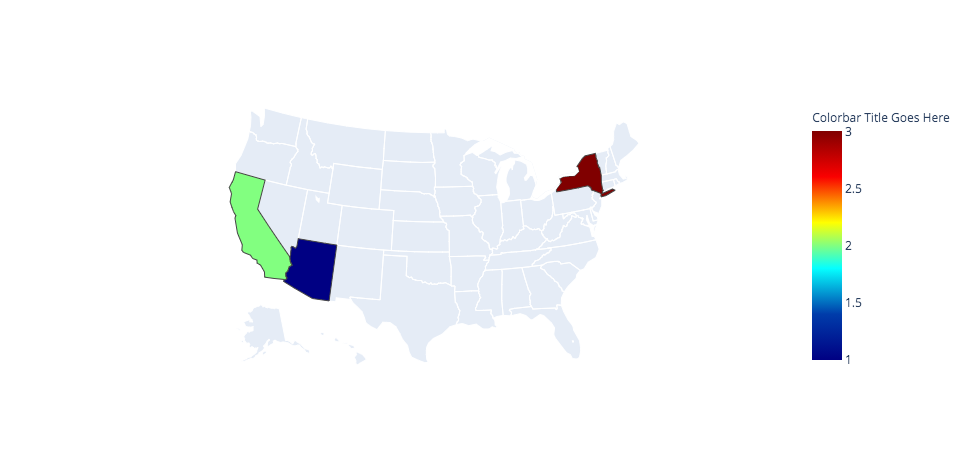

In [37]:
iplot( choromap )

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv( '../data/2011_US_AGRI_Exports.csv' )

In [40]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


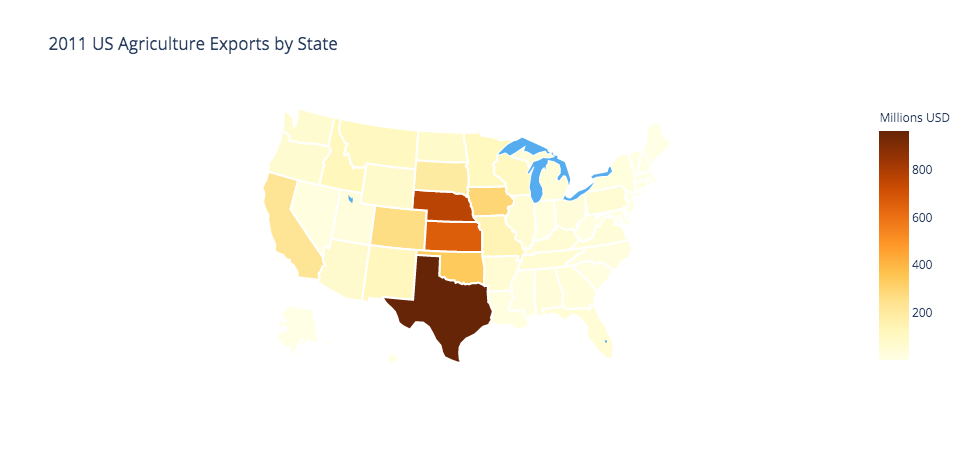

In [52]:
data = dict(
    type = 'choropleth',
    colorscale = 'ylorbr', #'YIOrRd',
    locations = df['code'],
    locationmode = 'USA-states',
    z = df['beef'],
    text = df[ 'text' ],
    colorbar = { 'title': 'Millions USD'},
    marker = dict(
        line = dict(
            color = 'rgb(255,255,255)',
            width = 2
        )
    ),
)
layout = dict(
    title='2011 US Agriculture Exports by State',
    geo = dict(
        scope='usa',
        showlakes = True,
        lakecolor = 'rgb(85,173,240)'
    )
)
choromap2 = go.Figure( data=[data], layout=layout )
iplot( choromap2 )